## Rubric

Instructions: DELETE this cell before you submit via a `git push` to your repo before deadline. This cell is for your reference only and is not needed in your report. 

Scoring: Out of 10 points

- Each Developing  => -2 pts
- Each Unsatisfactory/Missing => -4 pts
  - until the score is 

If students address the detailed feedback in a future checkpoint they will earn these points back


|                  | Unsatisfactory                                                                                                                                                                                                    | Developing                                                                                                                                                                                              | Proficient                                     | Excellent                                                                                                                              |
|------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------|
| Data relevance   | Did not have data relevant to their question. Or the datasets don't work together because there is no way to line them up against each other. If there are multiple datasets, most of them have this trouble | Data was only tangentially relevant to the question or a bad proxy for the question. If there are multiple datasets, some of them may be irrelevant or can't be easily combined.                       | All data sources are relevant to the question. | Multiple data sources for each aspect of the project. It's clear how the data supports the needs of the project.                         |
| Data description | Dataset or its cleaning procedures are not described. If there are multiple datasets, most have this trouble                                                                                              | Data was not fully described. If there are multiple datasets, some of them are not fully described                                                                                                      | Data was fully described                       | The details of the data descriptions and perhaps some very basic EDA also make it clear how the data supports the needs of the project. |
| Data wrangling   | Did not obtain data. They did not clean/tidy the data they obtained.  If there are multiple datasets, most have this trouble                                                                                 | Data was partially cleaned or tidied. Perhaps you struggled to verify that the data was clean because they did not present it well. If there are multiple datasets, some have this trouble | The data is cleaned and tidied.                | The data is spotless and they used tools to visualize the data cleanliness and you were convinced at first glance                      |


# COGS 108 - Data Checkpoint

## Authors

Instructions: REPLACE the contents of this cell with your team list and their contributions. Note that this will change over the course of the checkpoints

This is a modified [CRediT taxonomy of contributions](https://credit.niso.org). For each group member please list how they contributed to this project using these terms:
> Analysis, Background research, Conceptualization, Data curation, Experimental investigation, Methodology, Project administration, Software, Visualization, Writing – original draft, Writing – review & editing

Example team list and credits:
- Alice Anderson: Conceptualization, Data curation, Methodology, Writing - original draft
- Bob Barker:  Analysis, Software, Visualization
- Charlie Chang: Project administration, Software, Writing - review & editing
- Dani Delgado: Analysis, Background research, Visualization, Writing - original draft

## Research Question

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback



## Background and Prior Work

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Hypothesis


Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback


## Data

### Data overview

Instructions: REPLACE the contents of this cell with descriptions of your actual datasets.

For each dataset include the following information
- Dataset #1
  - Dataset Name:
  - Link to the dataset:
  - Number of observations:
  - Number of variables:
  - Description of the variables most relevant to this project
  - Descriptions of any shortcomings this dataset has with repsect to the project
- Dataset #2 (if you have more than one!)
  - same as above
- etc

Each dataset deserves either a set of bullet points as above or a few sentences if you prefer that method.

If you plan to use multiple datasets, add a few sentences about how you plan to combine these datasets.

Dataset #3

- **Dataset Name:** Social Media Usage and Emotional Well-Being  
- **Link to the dataset:** https://www.kaggle.com/datasets/emirhanai/social-media-usage-and-emotional-well-being
- **Number of observations:** Uses 3 Observations:
    - train.csv: 1001 rows
    - val.csv: 145 rows
    - test.csv: 103 rows
- **Number of variables:** 10 columns  

**Most Relevant Variables:**
This dataset is basically “social media behavior metrics” + a label for emotion. The main columns are:

User_ID: unique user identifier

Age (years) and Gender: basic demographics

Platform: which social media platform the user is associated with (ex: Instagram, Twitter, Facebook, etc.)

Daily_Usage_Time (minutes): time spent per day on the platform, measured in minutes

Posts_Per_Day / Likes_Received_Per_Day / Comments_Received_Per_Day / Messages_Sent_Per_Day: daily activity/engagement counts (all are “counts per day”)

Dominant_Emotion: the main emotion label for that user/day (ex: Happiness, Sadness, Anger, Anxiety, Boredom, Neutral)

**Shortcomings:**
Small dataset size (especially val/test). That limits how confident we can be about patterns/generalization.

Some community analyses report messy rows / parsing issues (ex: a “User_ID” that turns into text) and potential duplicates / inconsistencies in splits, so we should check types, bad rows, duplicates, and whether IDs overlap across files.

This is behavior data + a label, but we don’t have context like why the person felt that way, mental health history, or real clinical measures. So “emotion” here is just what the dataset defines, not a diagnosis.

- Dataset #4
  - Dataset Name: **Social Media and Mental Health** (survey; `smmh.csv`)
  - Link to the dataset (official Kaggle page): `https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health`
  - Reproducible raw CSV mirror used in this repo (no Kaggle login required): `https://raw.githubusercontent.com/Daerkns/correlation-between-social-media-and-mental-health/main/smmh.csv`
  - Number of observations: **481** survey responses (rows)
  - Number of variables: **21** columns
  - Description of the variables most relevant to this project:
    - Demographics/controls: age, gender, relationship status, occupation status, affiliated organization type
    - Social media usage: whether they use social media, which platforms (comma-separated list), and average time spent per day (categorical bins)
    - Wellbeing / mental health proxies (mostly Likert 1–5): distractedness, worries, concentration difficulty, social comparison frequency + feelings about comparisons, validation seeking, feeling depressed/down, interest fluctuation, sleep issues
  - Shortcomings / limitations:
    - Cross-sectional and self-reported survey data (no causal conclusions; subject to recall/social desirability bias)
    - Does not include direct “active interaction” counts (posting/commenting/DMs); we will treat it as a **supporting** dataset and use available proxies (time-spent, platforms, comparison/validation items)
    - Potential sample bias (survey respondents are not representative of all adults)
    - Small number of potentially inconsistent responses (e.g., `Do you use social media? = No` but other usage questions answered) that we will flag and handle explicitly in cleaning

In [1]:
# Run this code every time when you're actively developing modules in .py files.  It's not needed if you aren't making modules
#
## this code is necessary for making sure that any modules we load are updated here 
## when their source code .py files are modified

%load_ext autoreload
%autoreload 2

In [2]:
# Setup code -- this only needs to be run once after cloning the repo!
# This cell downloads raw data into `data/00-raw/`.

# If you're missing packages in your environment, uncomment this line
# %pip install pandas numpy matplotlib seaborn

import os
import urllib.request

# Ensure expected data directories exist.
os.makedirs('data/00-raw', exist_ok=True)
os.makedirs('data/01-interim', exist_ok=True)
os.makedirs('data/02-processed', exist_ok=True)

# Dataset #3 (Social Media Usage and Emotional Well-Being)
EMIR_DIR = 'data/00-raw/emirhanai'
EMIR_FILES = ['train.csv', 'val.csv', 'test.csv']

# Dataset #4 (Social Media and Mental Health)
SMMH_URL = 'https://raw.githubusercontent.com/Daerkns/correlation-between-social-media-and-mental-health/main/smmh.csv'
SMMH_LOCAL = 'data/00-raw/smmh.csv'

def download_if_missing(url: str, local_path: str) -> None:
    if os.path.exists(local_path) and os.path.getsize(local_path) > 0:
        print(f"Already exists: {local_path}")
        return

    print(f"Downloading to: {local_path}")
    urllib.request.urlretrieve(url, local_path)
    print(f"Downloaded: {local_path} ({os.path.getsize(local_path)} bytes)")

download_if_missing(SMMH_URL, SMMH_LOCAL)

Already exists: data/00-raw/smmh.csv


### Dataset #1 

Instructions: 
1. Change the header from Dataset #1 to something more descriptive of the dataset
2. Write a few paragraphs about this dataset. Make sure to cover
   1. Describe the important metrics, what units they are in, and giv some sense of what they mean.  For example "Fasting blood glucose in units of mg glucose per deciliter of blood.  Normal values for healthy individuals range from 70 to 100 mg/dL.  Values 100-125 are prediabetic and values >125mg/dL indicate diabetes. Values <70 indicate hypoglycemia. Fasting idicates the patient hasn't eaten in the last 8 hours.  If blood glucose is >250 or <50 at any time (regardless of the time of last meal) the patient's life may be in immediate danger"
   2. If there are any major concerns with the dataset, describe them. For example "Dataset is composed of people who are serious enough about eating healthy that they voluntarily downloaded an app dedicated to tracking their eating patterns. This sample is likely biased because of that self-selection. These people own smartphones and may be healthier and may have more disposable income than the average person.  Those who voluntarily log conscientiously and for long amounts of time are also likely even more interested in health than those who download the app and only log a bit before getting tired of it"
3. Use the cell below to 
    1. load the dataset 
    2. make the dataset tidy or demonstrate that it was already tidy
    3. demonstrate the size of the dataset
    4. find out how much data is missing, where its missing, and if its missing at random or seems to have any systematic relationships in its missingness
    5. find and flag any outliers or suspicious entries
    6. clean the data or demonstrate that it was already clean.  You may choose how to deal with missingness (dropna of fillna... how='any' or 'all') and you should justify your choice in some way
    7. You will load raw data from `data/00-raw/`, you will (optionally) write intermediate stages of your work to `data/01-interim` and you will write the final fully wrangled version of your data to `data/02-processed`
4. Optionally you can also show some summary statistics for variables that you think are important to the project
5. Feel free to add more cells here if that's helpful for you


In [3]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE


### Dataset #2 

See instructions above for Dataset #1.  Feel free to keep adding as many more datasets as you need.  Put each new dataset in its own section just like these. 

Lastly if you do have multiple datasets, add another section where you demonstrate how you will join, align, cross-reference or whatever to combine data from the different datasets

Please note that you can always keep adding more datasets in the future if these datasets you turn in for the checkpoint aren't sufficient.  The goal here is demonstrate that you can obtain and wrangle data.  You are not tied down to only use what you turn in right now.

In [4]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE


### Dataset #3: Social Media Usage and Emotional Well-Being (emirhanai)

- **Dataset Name:** Social Media Usage and Emotional Well-Being
- **Link to dataset:** https://www.kaggle.com/datasets/emirhanai/social-media-usage-and-emotional-well-being
- **Raw files used:** `train.csv`, `val.csv`, `test.csv` (stored in `data/00-raw/emirhanai/`)
- **Number of observations:** printed in the code cells below (train/val/test and combined)
- **Number of variables:** printed in the code cells below

**What this dataset contains:**
Each row represents a single user record with:
- Demographics (e.g., Age in years, Gender)
- Social media context (e.g., Platform)
- Usage/activity metrics (e.g., daily usage time in minutes, posts/likes/comments/messages per day)
- A label representing emotional state (e.g., Dominant_Emotion)

**Variables most relevant to our project:**
- Daily usage time (minutes) and daily activity counts (posts/likes/comments/messages)
- Platform + demographics (Age, Gender) for context/controls
- Emotion label (Dominant_Emotion) as the outcome

**Shortcomings / concerns:**
- Observational data: we can talk about associations, not causation.
- Emotion label is not a clinical diagnosis.
- CSV may contain messy rows (we handle this during loading and cleaning).


In [5]:
import pandas as pd
import numpy as np
from pathlib import Path

raw_dir = Path("data/00-raw/emirhanai")
interim_dir = Path("data/01-interim")
processed_dir = Path("data/02-processed")

interim_dir.mkdir(parents=True, exist_ok=True)
processed_dir.mkdir(parents=True, exist_ok=True)

train_path = raw_dir / "train.csv"
val_path   = raw_dir / "val.csv"
test_path  = raw_dir / "test.csv"

train_path, val_path, test_path

def safe_read_csv(path):
    return pd.read_csv(
        path,
        engine="python",
        on_bad_lines="skip"
    )

train = safe_read_csv(train_path)
val   = safe_read_csv(val_path)
test  = safe_read_csv(test_path)

print("train:", train.shape)
print("val:  ", val.shape)
print("test: ", test.shape)


df = pd.concat([train, val, test], ignore_index=True)
print("combined shape:", df.shape)

df.head()



train: (1001, 10)
val:   (145, 10)
test:  (103, 10)
combined shape: (1249, 10)


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


**Setup:** Importedthe libraries we need and define the file paths for Dataset #3 (train/val/test). Also make sure the interim and processed folders exist so we can save cleaned data later.

**Load data:** Read `train.csv`, `val.csv`, and `test.csv` from `data/00-raw/emirhanai/`. A few lines are malformed so to have the notebook run top-to-bottom without crashing we used a diff CSV loader.

**Combine splits:** Concatenate train/val/test into one dataframe for cleaning and exploratory checks. This does not change the data values; it just makes it easier to analyze everything together.

In [6]:
# Make columns easier to work with (Tidy)
df.columns = (
    df.columns
      .str.strip()
      .str.replace(" ", "_")
      .str.replace("(", "", regex=False)
      .str.replace(")", "", regex=False)
)

print(df.columns.tolist())


['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time_minutes', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Dominant_Emotion']


**Tidy check:** Confirm the dataset is already tidy (each row is one observation and each column is one variable). Also standardize column names to make them easier to reference in Python.

In [7]:
# Convert Age to numeric (bad strings become NaN)
if "Age" in df.columns:
    df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

# Same idea for usage + counts if they exist
num_cols = [
    "Daily_Usage_Time_minutes",
    "Posts_Per_Day",
    "Likes_Received_Per_Day",
    "Comments_Received_Per_Day",
    "Messages_Sent_Per_Day"
]

for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

df.dtypes


User_ID                       object
Age                          float64
Gender                        object
Platform                      object
Daily_Usage_Time_minutes     float64
Posts_Per_Day                float64
Likes_Received_Per_Day       float64
Comments_Received_Per_Day    float64
Messages_Sent_Per_Day        float64
Dominant_Emotion              object
dtype: object

**Data types:** Convert columns like Age and activity metrics to numeric types. Any non-numeric values become missing (`NaN`), which we handle later during cleaning.


In [8]:
print("Rows (observations):", df.shape[0])
print("Columns (variables):", df.shape[1])


Rows (observations): 1249
Columns (variables): 10


**Dataset size:** Report the number of observations (rows) and variables (columns) so we can document dataset size for the checkpoint.

In [9]:
#Missing Data
missing_count = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False).round(2)

missing_table = pd.DataFrame({
    "missing_count": missing_count,
    "missing_pct": missing_pct
})

display(missing_table[missing_table["missing_count"] > 0])


,missing_count,missing_pct
Age,91,7.29
Messages_Sent_Per_Day,2,0.16
Dominant_Emotion,2,0.16
Gender,1,0.08
Platform,1,0.08
Daily_Usage_Time_minutes,1,0.08
Posts_Per_Day,1,0.08
Likes_Received_Per_Day,1,0.08
Comments_Received_Per_Day,1,0.08


**Missing data:** Calculate how much data is missing in each column and check where missingness happens. We also do a simple check to see if missing values are more common in some groups.

In [10]:
df["flag_suspicious"] = False

# Age suspicious
if "Age" in df.columns:
    df.loc[(df["Age"] < 10) | (df["Age"] > 100), "flag_suspicious"] = True

# Daily usage suspicious (minutes in a day is 0–1440)
if "Daily_Usage_Time_minutes" in df.columns:
    df.loc[(df["Daily_Usage_Time_minutes"] < 0) | (df["Daily_Usage_Time_minutes"] > 1440), "flag_suspicious"] = True

# Negative counts suspicious
count_cols = ["Posts_Per_Day","Likes_Received_Per_Day","Comments_Received_Per_Day","Messages_Sent_Per_Day"]
for c in count_cols:
    if c in df.columns:
        df.loc[df[c] < 0, "flag_suspicious"] = True

print("Suspicious rows:", int(df["flag_suspicious"].sum()))
display(df[df["flag_suspicious"]].head(10))


Suspicious rows: 0


,User_ID,Age,Gender,Platform,Daily_Usage_Time_minutes,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,flag_suspicious


**Outliers & suspicious values:** Flag entries that are outside realistic ranges. We flag first so we can inspect before deciding to remove anything.


In [11]:
# Save interim version (after dtype fixes + suspicious flag)
df.to_csv(interim_dir / "emirhanai_interim.csv", index=False)

df_clean = df.copy()

# 1) duplicates
before = len(df_clean)
df_clean = df_clean.drop_duplicates()
print("Dropped duplicates:", before - len(df_clean))

# 2) suspicious
before = len(df_clean)
df_clean = df_clean[df_clean["flag_suspicious"] == False].copy()
print("Dropped suspicious:", before - len(df_clean))

# 3) missingness handling (drop rows missing key fields)
key_cols = ["Age", "Gender", "Platform", "Daily_Usage_Time_minutes", "Dominant_Emotion"]
key_cols = [c for c in key_cols if c in df_clean.columns]

before = len(df_clean)
df_clean = df_clean.dropna(subset=key_cols)
print("Dropped missing key fields:", before - len(df_clean))

# Save processed
df_clean.to_csv(processed_dir / "emirhanai_processed.csv", index=False)
print("Final cleaned shape:", df_clean.shape)
df_clean.head()


Dropped duplicates: 22
Dropped suspicious: 0
Dropped missing key fields: 91
Final cleaned shape: (1136, 11)


,User_ID,Age,Gender,Platform,Daily_Usage_Time_minutes,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,flag_suspicious
0,1,25.0,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness,False
1,2,30.0,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger,False
2,3,22.0,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral,False
3,4,28.0,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety,False
4,5,33.0,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom,False


In [12]:
df_clean.describe().round()

,Age,Daily_Usage_Time_minutes,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,1136.0,1136.0,1136.0,1136.0,1136.0,1136.0
mean,27.0,96.0,3.0,40.0,16.0,22.0
std,4.0,39.0,2.0,27.0,9.0,9.0
min,21.0,40.0,1.0,5.0,2.0,8.0
25%,24.0,65.0,2.0,18.0,8.0,16.0
50%,27.0,85.0,3.0,30.0,14.0,22.0
75%,30.0,120.0,5.0,55.0,22.0,28.0
max,35.0,200.0,8.0,110.0,40.0,50.0


**Cleaning & saving:** Remove duplicates and clearly suspicious rows, then handle missing values in key columns. Save an interim dataset (`data/01-interim/`) and the final cleaned dataset (`data/02-processed/`) for later analysis/modeling.

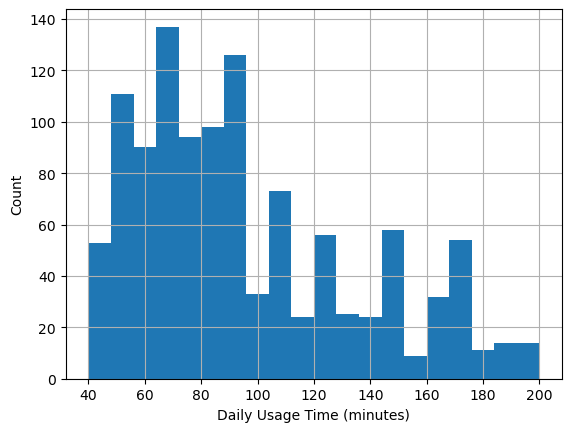

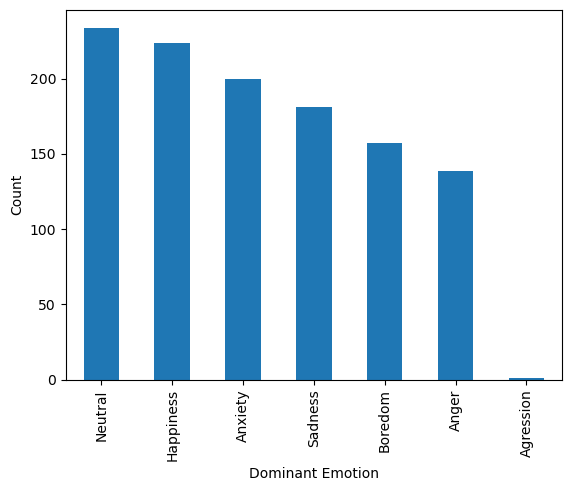

In [13]:
import matplotlib.pyplot as plt

# Histogram (daily minutes)
if "Daily_Usage_Time_minutes" in df_clean.columns:
    plt.figure()
    df_clean["Daily_Usage_Time_minutes"].hist(bins=20)
    plt.xlabel("Daily Usage Time (minutes)")
    plt.ylabel("Count")
    plt.show()

# Bar chart (emotion)
if "Dominant_Emotion" in df_clean.columns:
    plt.figure()
    df_clean["Dominant_Emotion"].value_counts().plot(kind="bar")
    plt.xlabel("Dominant Emotion")
    plt.ylabel("Count")
    plt.show()


**Summary + visuals (optional):** Showed basic summary statistics and simple plots to better understand distributions (like daily usage time) and class balance (dominant emotion). This helps verify the dataset looks reasonable after cleaning.

### Dataset #4: Social Media and Mental Health (`smmh.csv`)

**Official dataset page (citation):** `https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health`

**How we download it reproducibly for this repo:** Kaggle downloads require login/terms acceptance, so for reproducibility we download the same `smmh.csv` from a public raw mirror into `data/00-raw/` using the setup cell above.

Each row is one survey response (timestamped). Columns include demographics, social media usage (platforms + time-spent category), and several mental-health / wellbeing proxy items (mostly Likert 1–5).

In the wrangling below we:
- Rename verbose survey-question column names to short `snake_case` names
- Parse timestamps and coerce numeric Likert items
- Standardize key categorical values (e.g., gender labels)
- Engineer a numeric **hours/day** proxy from the time-spent categories
- Expand the comma-separated platforms field into a small set of indicator columns
- Check missingness, outliers, and a small set of internal inconsistencies
- Save a processed dataset to `data/02-processed/smmh_processed.csv`

In [14]:
import pandas as pd
import numpy as np

raw_path = 'data/00-raw/smmh.csv'

# Load raw data (downloaded in the setup cell)
df_raw = pd.read_csv(raw_path, skipinitialspace=True)
df_raw.columns = [c.strip() for c in df_raw.columns]

rename_map = {
    'Timestamp': 'timestamp',
    '1. What is your age?': 'age',
    '2. Gender': 'gender',
    '3. Relationship Status': 'relationship_status',
    '4. Occupation Status': 'occupation_status',
    '5. What type of organizations are you affiliated with?': 'organization_affiliation',
    '6. Do you use social media?': 'uses_social_media_answer',
    '7. What social media platforms do you commonly use?': 'platforms',
    '8. What is the average time you spend on social media every day?': 'avg_daily_time',
    '9. How often do you find yourself using Social media without a specific purpose?': 'sm_no_purpose_freq',
    '10. How often do you get distracted by Social media when you are busy doing something?': 'sm_distracted_freq',
    "11. Do you feel restless if you haven't used Social media in a while?": 'sm_restless_freq',
    '12. On a scale of 1 to 5, how easily distracted are you?': 'easily_distracted',
    '13. On a scale of 1 to 5, how much are you bothered by worries?': 'bothered_by_worries',
    '14. Do you find it difficult to concentrate on things?': 'difficulty_concentrating',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?': 'compare_to_successful_freq',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?': 'feel_about_comparisons',
    '17. How often do you look to seek validation from features of social media?': 'seek_validation_freq',
    '18. How often do you feel depressed or down?': 'depressed_or_down_freq',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?': 'interest_fluctuation',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?': 'sleep_issues',
}

missing_cols = sorted(set(rename_map) - set(df_raw.columns))
if missing_cols:
    raise ValueError(f"Unexpected raw columns (missing expected): {missing_cols}")

# Rename columns
df = df_raw.rename(columns=rename_map).copy()

# Parse timestamp + age
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Standardize string columns
string_cols = [
    'gender',
    'relationship_status',
    'occupation_status',
    'organization_affiliation',
    'uses_social_media_answer',
    'platforms',
    'avg_daily_time',
    'feel_about_comparisons',
]
for c in string_cols:
    df[c] = df[c].astype('string').str.strip()

# Normalize gender labels (keep it simple + transparent)
def _normalize_gender(x):
    if pd.isna(x):
        return pd.NA
    s = str(x).strip()
    s_low = s.lower()

    if s_low in {'nb', 'nonbinary', 'non-binary'}:
        return 'Non-binary'
    if s_low in {'unsure'}:
        return 'Unsure'
    if s_low in {'trans'}:
        return 'Trans'

    # Common values like 'Male'/'Female' stay as-is (titlecased)
    return s.title()

df['gender'] = df['gender'].map(_normalize_gender)

# Coerce Likert-style items to numeric
likert_cols = [
    'sm_no_purpose_freq',
    'sm_distracted_freq',
    'sm_restless_freq',
    'easily_distracted',
    'bothered_by_worries',
    'difficulty_concentrating',
    'compare_to_successful_freq',
    'seek_validation_freq',
    'depressed_or_down_freq',
    'interest_fluctuation',
    'sleep_issues',
]
for c in likert_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce').astype('Int64')

print('Raw shape:', df_raw.shape)
print('Renamed/typed shape:', df.shape)
df.head(3)

Raw shape: (481, 21)
Renamed/typed shape: (481, 21)


,timestamp,age,gender,relationship_status,occupation_status,organization_affiliation,uses_social_media_answer,platforms,avg_daily_time,sm_no_purpose_freq,...,sm_restless_freq,easily_distracted,bothered_by_worries,difficulty_concentrating,compare_to_successful_freq,feel_about_comparisons,seek_validation_freq,depressed_or_down_freq,interest_fluctuation,sleep_issues
0,2022-04-18 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,2022-04-18 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,2022-04-18 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5


In [15]:
# --- Feature engineering: platforms + time spent ---

from IPython.display import display

# Convert Yes/No to a boolean indicator (keep original + a cleaned version)
df['uses_social_media_original'] = (
    df['uses_social_media_answer']
      .str.lower()
      .map({'yes': True, 'no': False})
      .astype('boolean')
)

common_platforms = [
    'Facebook', 'Instagram', 'Twitter', 'YouTube',
    'TikTok', 'Snapchat', 'Discord', 'Reddit', 'Pinterest'
]
_common_set = set(common_platforms)

def _normalize_platform(p: str) -> str:
    p = p.strip()
    p_low = p.lower()

    mapping = {
        'youtube': 'YouTube',
        'tik tok': 'TikTok',
        'tiktok': 'TikTok',
        'fb': 'Facebook',
        'x': 'Twitter',
    }
    if p_low in mapping:
        return mapping[p_low]

    # Keep capitalization consistent for common platforms
    for canon in common_platforms:
        if p_low == canon.lower():
            return canon

    return p.title()

def _parse_platforms(x):
    if pd.isna(x):
        return []
    items = [i.strip() for i in str(x).split(',') if i.strip()]
    norm = [_normalize_platform(i) for i in items]

    # De-duplicate while preserving order
    out = []
    seen = set()
    for p in norm:
        if p not in seen:
            out.append(p)
            seen.add(p)
    return out

platform_list = df['platforms'].map(_parse_platforms)
df['platform_count'] = platform_list.map(len)
df['platforms_clean'] = platform_list.map(lambda lst: ', '.join(lst) if lst else pd.NA).astype('string')

for p in common_platforms:
    col = f"uses_{p.lower()}".replace(' ', '_')
    df[col] = platform_list.map(lambda lst, p=p: p in lst).astype('boolean')

df['uses_other_platform'] = platform_list.map(lambda lst: any(p not in _common_set for p in lst)).astype('boolean')

# Map time-spent bins to an approximate numeric hours/day proxy.
# Midpoints are used for closed intervals; "More than 5 hours" is set to 5.5 as a conservative constant.
time_to_hours = {
    'Less than an Hour': 0.5,
    'Between 1 and 2 hours': 1.5,
    'Between 2 and 3 hours': 2.5,
    'Between 3 and 4 hours': 3.5,
    'Between 4 and 5 hours': 4.5,
    'More than 5 hours': 5.5,
}
df['avg_daily_hours'] = df['avg_daily_time'].map(time_to_hours).astype('Float64')

# --- Data quality checks: missingness, outliers, inconsistencies ---

print('\nAge range (min/max):', df['age'].min(), df['age'].max())
print('Age quantiles:')
print(df['age'].quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1]).to_string())

# Flag ages that are suspicious for an "adults 18+" research question
suspicious_age_mask = (df['age'] < 18) | (df['age'] > 100)
print('\nSuspicious ages (<18 or >100):', int(suspicious_age_mask.sum()))
if suspicious_age_mask.any():
    display(df.loc[suspicious_age_mask, ['timestamp', 'age', 'gender']].head(10))

# Missingness summary
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean() * 100).round(2)
missing_table = pd.DataFrame({'missing_count': missing, 'missing_pct': missing_pct}).query('missing_count > 0')
print('\nMissingness (only columns with missing values):')
display(missing_table)

# Inconsistency: answered "No" to using social media but still provided platforms or time spent
inferred_use = (df['platform_count'] > 0) | df['avg_daily_hours'].notna()
inconsistent = (df['uses_social_media_original'] == False) & inferred_use
print('\nInconsistent rows (uses_social_media_original == False but usage fields present):', int(inconsistent.sum()))
if inconsistent.any():
    display(df.loc[inconsistent, ['uses_social_media_answer', 'platforms', 'avg_daily_time', 'platform_count']].head(10))

# Cleaning rule: keep the original answer, but also create a "clean" usage boolean that
# treats any reported usage fields as evidence of actual use.
df['uses_social_media'] = (
    df['uses_social_media_original']
      .fillna(False)
      .astype('boolean')
    | inferred_use.astype('boolean')
)

# Check Likert ranges
likert_minmax = df[likert_cols].agg(['min', 'max']).T
out_of_range = (df[likert_cols] < 1) | (df[likert_cols] > 5)
print('\nLikert min/max (should be within 1–5):')
display(likert_minmax)
print('Out-of-range Likert entries (count):', int(out_of_range.sum().sum()))

# --- Save processed dataset ---

processed_cols = [
    'timestamp', 'age', 'gender', 'relationship_status', 'occupation_status', 'organization_affiliation',
    'uses_social_media_original', 'uses_social_media',
    'avg_daily_time', 'avg_daily_hours',
    'platforms_clean', 'platform_count',
] + [
    f"uses_{p.lower()}".replace(' ', '_') for p in common_platforms
] + [
    'uses_other_platform',
    'sm_no_purpose_freq', 'sm_distracted_freq', 'sm_restless_freq',
    'easily_distracted', 'bothered_by_worries', 'difficulty_concentrating',
    'compare_to_successful_freq', 'feel_about_comparisons', 'seek_validation_freq',
    'depressed_or_down_freq', 'interest_fluctuation', 'sleep_issues'
]

processed_path = 'data/02-processed/smmh_processed.csv'
df_processed = df[processed_cols].copy()
df_processed.to_csv(processed_path, index=False)

print(f"\nSaved processed dataset to: {processed_path}")
print('Processed shape:', df_processed.shape)
df_processed.head(3)


Age range (min/max): 13.0 91.0
Age quantiles:
0.00    13.0
0.01    14.0
0.25    21.0
0.50    22.0
0.75    26.0
0.99    56.0
1.00    91.0

Suspicious ages (<18 or >100): 19


,timestamp,age,gender
47,2022-04-18 22:00:21,17.0,Female
68,2022-04-19 00:11:52,14.0,Male
72,2022-04-19 00:28:13,14.0,Female
84,2022-04-19 06:31:10,17.0,Male
93,2022-04-19 10:24:04,17.0,Unsure
96,2022-04-19 13:52:52,14.0,Male
99,2022-04-19 14:45:58,16.0,Male
129,2022-04-19 21:48:13,16.0,Male
198,2022-04-20 23:45:22,17.0,Male
279,2022-05-11 21:08:41,17.0,Male



Missingness (only columns with missing values):


,missing_count,missing_pct
organization_affiliation,30,6.24



Inconsistent rows (uses_social_media_original == False but usage fields present): 3


,uses_social_media_answer,platforms,avg_daily_time,platform_count
9,No,"Reddit, Pinterest",Less than an Hour,2
54,No,"YouTube, Discord, Reddit",Between 1 and 2 hours,3
134,No,"Instagram, YouTube",Between 1 and 2 hours,2



Likert min/max (should be within 1–5):


,min,max
sm_no_purpose_freq,1,5
sm_distracted_freq,1,5
sm_restless_freq,1,5
easily_distracted,1,5
bothered_by_worries,1,5
difficulty_concentrating,1,5
compare_to_successful_freq,1,5
seek_validation_freq,1,5
depressed_or_down_freq,1,5
interest_fluctuation,1,5


Out-of-range Likert entries (count): 0

Saved processed dataset to: data/02-processed/smmh_processed.csv
Processed shape: (481, 34)


,timestamp,age,gender,relationship_status,occupation_status,organization_affiliation,uses_social_media_original,uses_social_media,avg_daily_time,avg_daily_hours,...,sm_restless_freq,easily_distracted,bothered_by_worries,difficulty_concentrating,compare_to_successful_freq,feel_about_comparisons,seek_validation_freq,depressed_or_down_freq,interest_fluctuation,sleep_issues
0,2022-04-18 19:18:47,21.0,Male,In a relationship,University Student,University,True,True,Between 2 and 3 hours,2.5,...,2,5,2,5,2,3,2,5,4,5
1,2022-04-18 19:19:28,21.0,Female,Single,University Student,University,True,True,More than 5 hours,5.5,...,2,4,5,4,5,1,1,5,4,5
2,2022-04-18 19:25:59,21.0,Female,Single,University Student,University,True,True,Between 3 and 4 hours,3.5,...,1,2,5,4,3,3,1,4,2,5


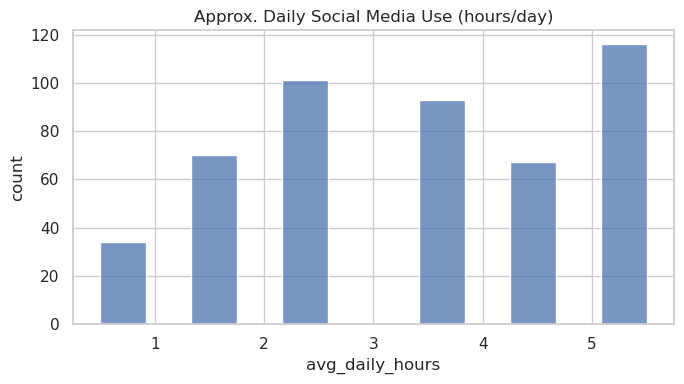

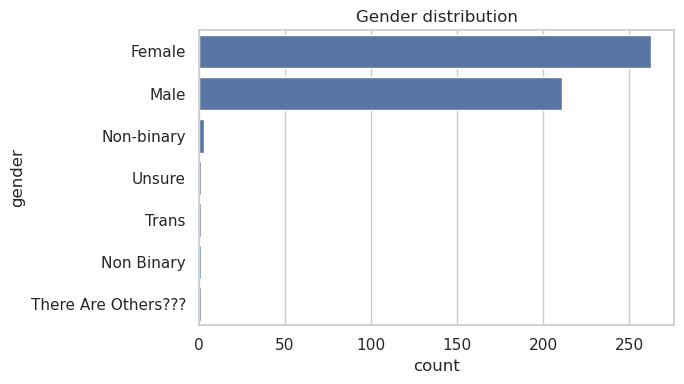

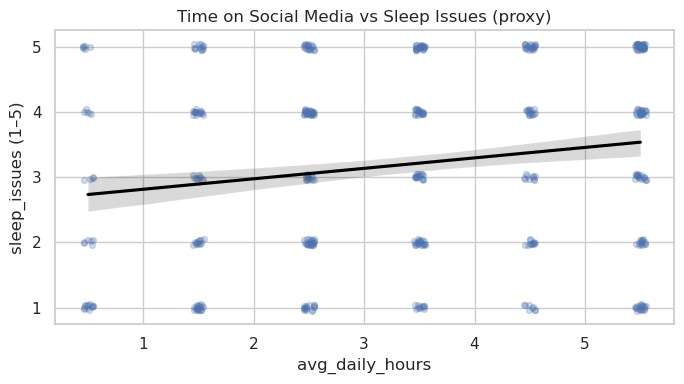

In [16]:
# --- Minimal EDA (sanity-check visuals) ---

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

# Distribution of time spent (numeric proxy)
plt.figure(figsize=(7, 4))
sns.histplot(df_processed['avg_daily_hours'].dropna().astype(float), bins=12)
plt.title('Approx. Daily Social Media Use (hours/day)')
plt.xlabel('avg_daily_hours')
plt.ylabel('count')
plt.tight_layout()
plt.show()

# Gender distribution
plt.figure(figsize=(7, 4))
order = df_processed['gender'].value_counts(dropna=False).index
sns.countplot(data=df_processed, y='gender', order=order)
plt.title('Gender distribution')
plt.xlabel('count')
plt.ylabel('gender')
plt.tight_layout()
plt.show()

# Relationship between time spent and sleep issues (Likert 1–5)
eda_tmp = df_processed.dropna(subset=['avg_daily_hours', 'sleep_issues']).copy()
eda_tmp['avg_daily_hours'] = eda_tmp['avg_daily_hours'].astype(float)
eda_tmp['sleep_issues'] = pd.to_numeric(eda_tmp['sleep_issues'], errors='coerce')

plt.figure(figsize=(7, 4))
sns.regplot(
    data=eda_tmp,
    x='avg_daily_hours',
    y='sleep_issues',
    x_jitter=0.05,
    y_jitter=0.05,
    scatter_kws={'alpha': 0.25, 's': 18},
    line_kws={'color': 'black'}
)
plt.title('Time on Social Media vs Sleep Issues (proxy)')
plt.xlabel('avg_daily_hours')
plt.ylabel('sleep_issues (1–5)')
plt.tight_layout()
plt.show()

## Ethics

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Team Expectations 

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback


## Project Timeline Proposal

Instructions: Replace this with your timeline.  **PLEASE UPDATE your Timeline!** No battle plan survives contact with the enemy, so make sure we understand how your plans have changed.  Also if you have lost points on the previous checkpoint fix them